In this page we talk a little about the velocity of stars in Leo4, Leo5 or the Area Between.

1. we import the package.

In [2]:
import sys
import matplotlib
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, axis
from matplotlib.patches import Ellipse
import scipy
import numpy as np
from numpy import *
import math
import pylab
import random
from pylab import *
from astropy.coordinates import SkyCoord
from astropy import units as u
import pylab as P
from astropy.io import ascii
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

matplotlib.style.use('ggplot')

sns.set_style('darkgrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

2.We import and read the data(the data is of course attached to the package).

In [3]:
dat4=ascii.read("../CodingPandas/Leo4_lisp_rod_sdss_ppmxl",data_start=2)
dat5=ascii.read("../CodingPandas/Leo5_lisp_rod_sdss_ppmxl",data_start=2)
datB=ascii.read("../CodingPandas/LeoB_lisp_rod_sdss_ppmxl",data_start=2)

3. We read the information we would like to talk about.

In [8]:
vhc4 = dat4['Vhel']
verr4 = dat4['Verr']
Radeg4=dat4['RA']
Decdeg4=dat4['DEC']
r4=dat4['rmag']
g4=dat4['gmag']
g_r4=g4-r4

vhc5 = dat5['Vhel']
verr5 = dat5['Verr']
Radeg5=dat5['RA']
Decdeg5=dat5['DEC']
r5=dat5['rmag']
g5=dat5['gmag']
g_r5=g5-r5

vhcB = datB['Vhel']
verrB = datB['Verr']
RadegB=datB['RA']
DecdegB=datB['DEC']
rB=datB['rmag']
gB=datB['gmag']
g_rB=gB-rB

4.As we saw before, the Data in Leo 4 and Leo 5 has two components of velocity distribution. Therefore,we see that distribution of the velocity in the three areas.The high speed parts are marked as you can see. 

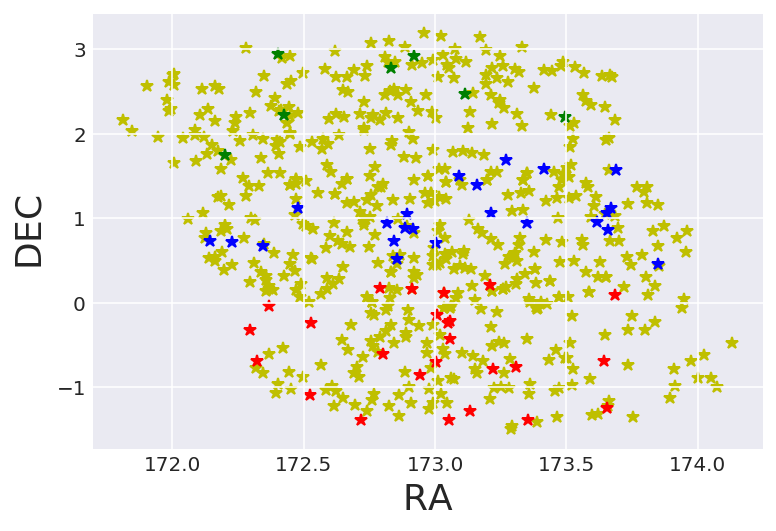

In [11]:
fig0=plt.figure(1)
ax=fig0.add_subplot(111)
ax.plot(Radeg4[vhc4<=200],Decdeg4[vhc4<=200],'y*',label='Leo4',zorder=-1)
#ax.plot(Radeg5[vhc5>=200],Decdeg5[vhc5>=200],'*',label='Leo5',zorder=-1)
ax.plot(Radeg5[vhc5<=250],Decdeg5[vhc5<=250],'y*',label='Leo5',zorder=-1)
ax.plot(RadegB[vhcB<=200],DecdegB[vhcB<=200],'y*',label='Leo4.5',zorder=-1)

ax.plot(Radeg4[vhc4>=200],Decdeg4[vhc4>=200],'r*',label='Leo4',zorder=-1)
#ax.plot(Radeg5[vhc5>=200],Decdeg5[vhc5>=200],'*',label='Leo5',zorder=-1)
ax.plot(Radeg5[vhc5>=250],Decdeg5[vhc5>=250],'g*',label='Leo5',zorder=-1)
ax.plot(RadegB[vhcB>=200],DecdegB[vhcB>=200],'b*',label='Leo4.5',zorder=-1)

ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{DEC}$',fontsize=18)
#ax.legend(markerscale=(2), loc=1, numpoints=1)
plt.show()

5.What if we see whether the velocity of marked points are distributed unevenly accroding to position.

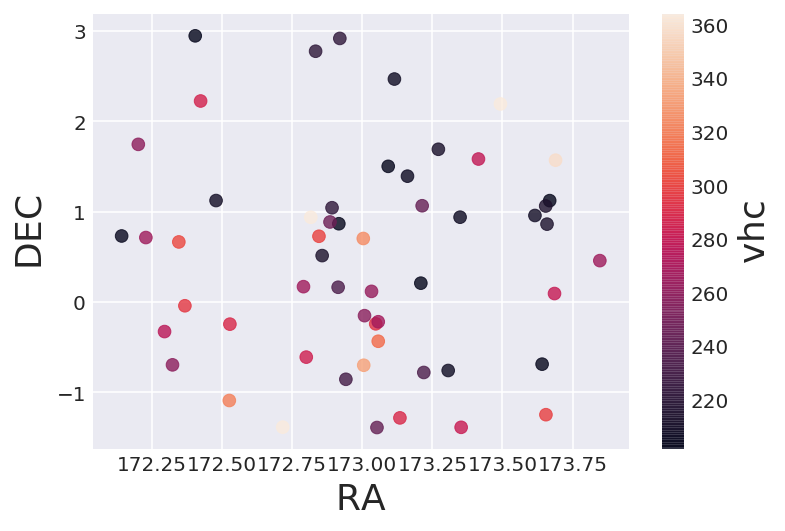

In [12]:
fig2=plt.figure(2)
ax=fig2.add_subplot(111)
plt.scatter(Radeg4[vhc4>=200],Decdeg4[vhc4>=200],marker='o',s=40,c=vhc4[vhc4>=200],label='Leo4', alpha=0.8)
plt.scatter(Radeg5[vhc5>=250],Decdeg5[vhc5>=250],marker='o',s=40,c=vhc5[vhc5>=250],label='Leo5', alpha=0.8)
plt.scatter(RadegB[vhcB>=200],DecdegB[vhcB>=200],marker='o',s=40,c=vhcB[vhcB>=200],label='Leo4.5', alpha=0.8)


cbar=plt.colorbar()
cbar.set_label(r'$\mathrm{vhc}$',fontsize=18)
ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{DEC}$',fontsize=18)
plt.show()

6.I also want to see whether the type of stars are related to the speed they have?

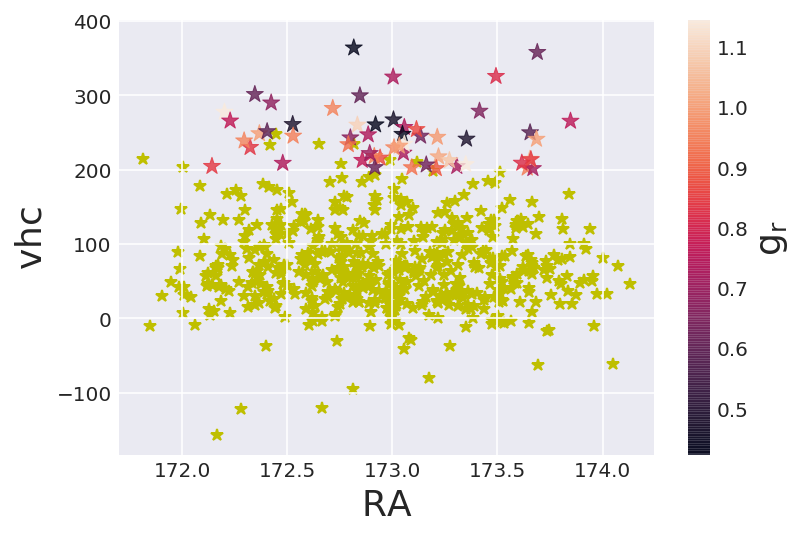

In [51]:
fig0=plt.figure(1)
ax=fig0.add_subplot(111)
ax.plot(Radeg4[vhc4<=200],vhc4[vhc4<=200],'y*',label='Leo4',zorder=-1)
####ax.plot(Radeg5[vhc5>=200],Decdeg5[vhc5>=200],'*',label='Leo5',zorder=-1)
ax.plot(Radeg5[vhc5<=250],vhc5[vhc5<=250],'y*',label='Leo5',zorder=-1)
ax.plot(RadegB[vhcB<=200],vhcB[vhcB<=200],'y*',label='Leo4.5',zorder=-1)

plt.scatter(Radeg4[vhc4>=200],vhc4[vhc4>=200],marker='*',s=80,c=g_r4[vhc4>=200],label='Leo4', alpha=0.8)
plt.scatter(Radeg5[vhc5>=250],vhc5[vhc5>=250],marker='*',s=80,c=g_r5[vhc5>=250],label='Leo5', alpha=0.8)
plt.scatter(RadegB[vhcB>=200],vhcB[vhcB>=200],marker='*',s=80,c=g_rB[vhcB>=200],label='Leo4.5', alpha=0.8)
cbar=plt.colorbar()
cbar.set_label(r'$\mathrm{g_r}$',fontsize=18)



#ax.plot(Radeg4[vhc4>=200],vhc4[vhc4>=200],'r*',label='Leo4',zorder=-1)
####ax.plot(Radeg5[vhc5>=200],Decdeg5[vhc5>=200],'*',label='Leo5',zorder=-1)
#ax.plot(Radeg5[vhc5>=250],vhc5[vhc5>=250],'g*',label='Leo5',zorder=-1)
#ax.plot(RadegB[vhcB>=200],vhcB[vhcB>=200],'b*',label='Leo4.5',zorder=-1)

ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{vhc}$',fontsize=18)
#ax.legend(markerscale=(2), loc=1, numpoints=1)
plt.show()

To be continued...